# **1. Perkenalan Dataset**

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

# **3. Memuat Dataset**

In [2]:
df = pd.read_csv("./car_price_dataset.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB
None
Summary Statistics:
               count          mean           std     min       25%       50%  \
Year         10000.0    2011.54370      6.897699  2000.0   2006.00    2012.0   
Engine_Size  10000.0       3.00056      1.149324     1.0      2.00       3.0   
Mileage      10

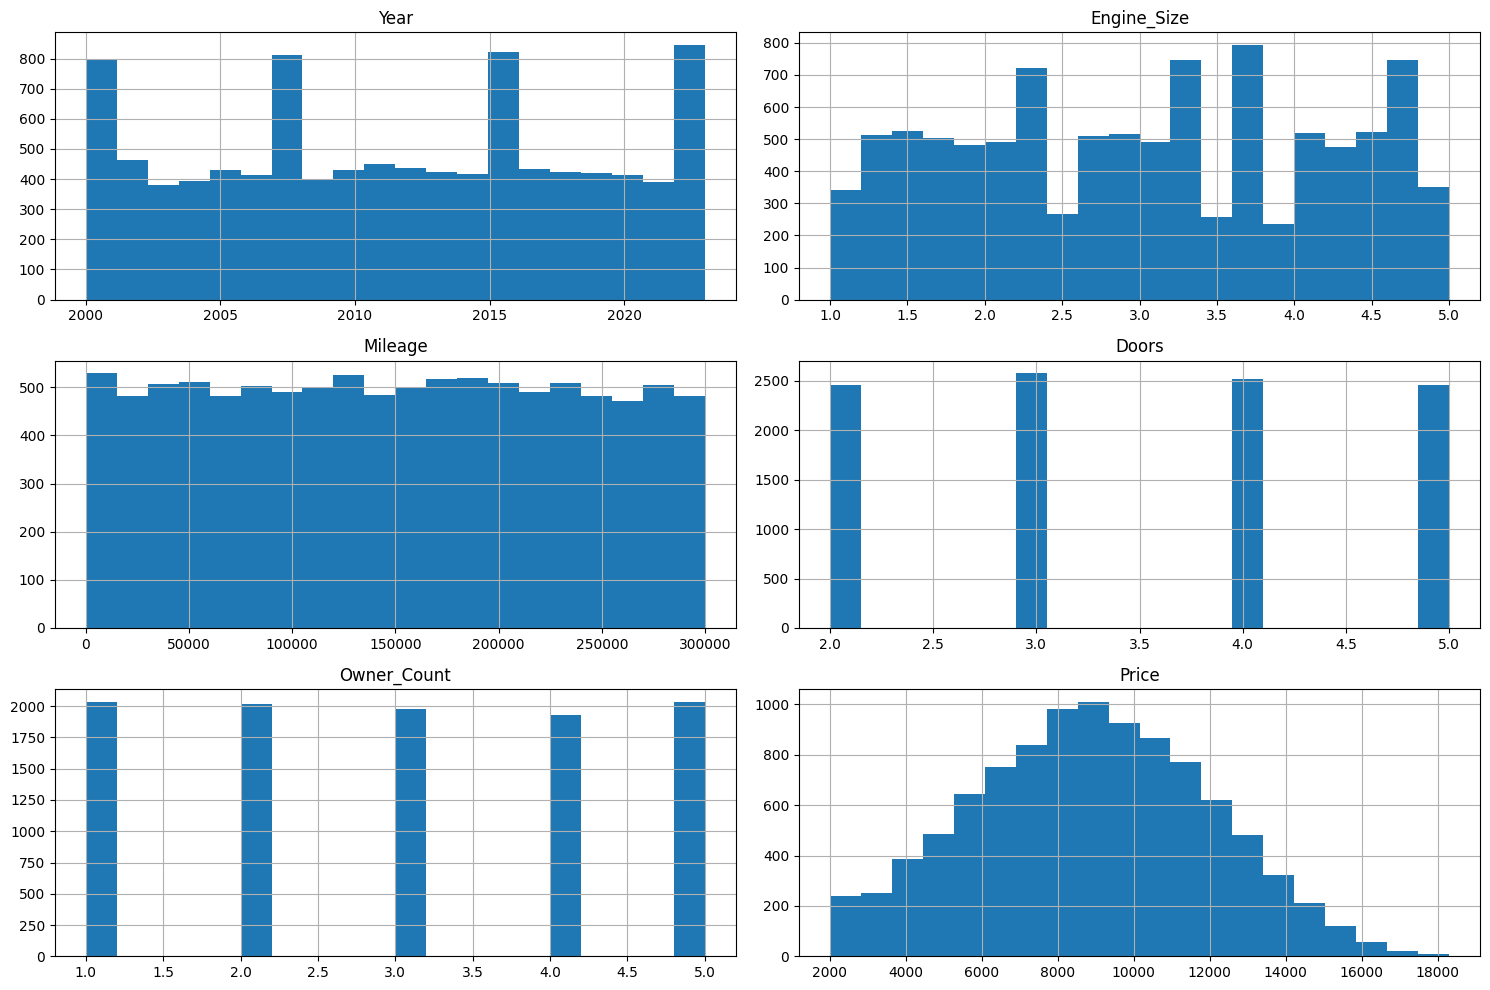

Boxplots of Numerical Variables:


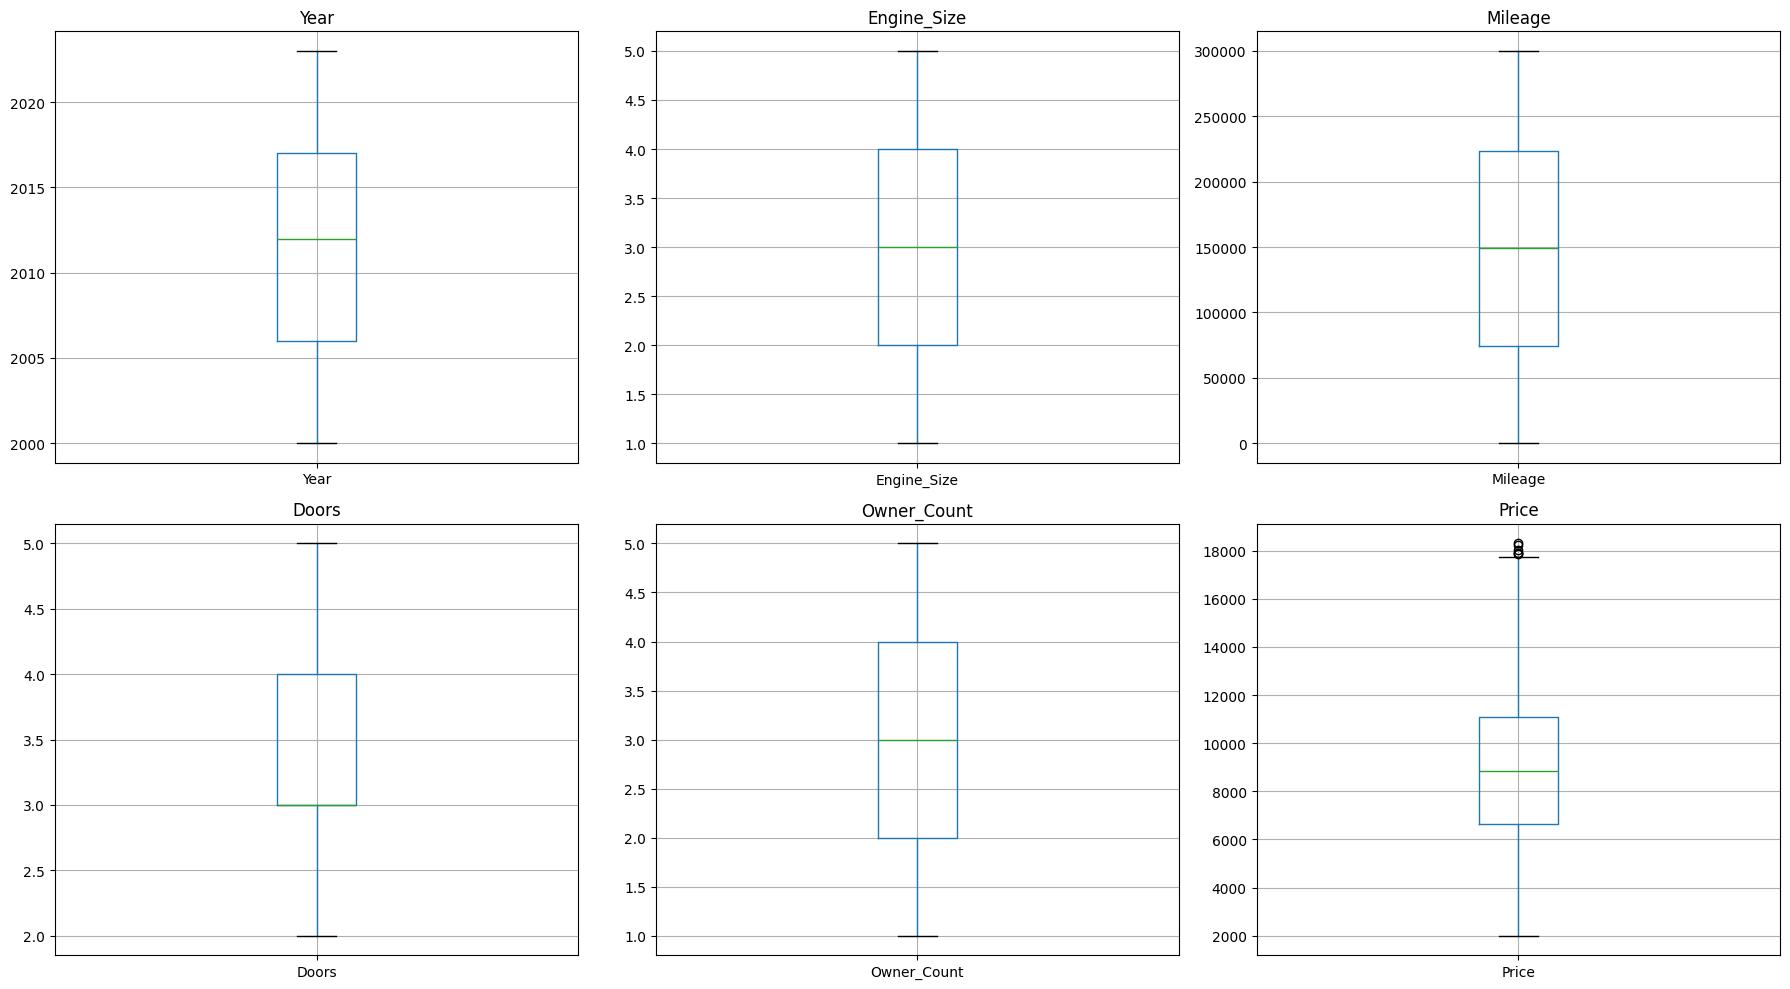

Count Outliers in Numerical Variables:
Year: 0 outliers
Engine_Size: 0 outliers
Mileage: 0 outliers
Doors: 0 outliers
Owner_Count: 0 outliers
Price: 6 outliers
Correlation Heatmap:


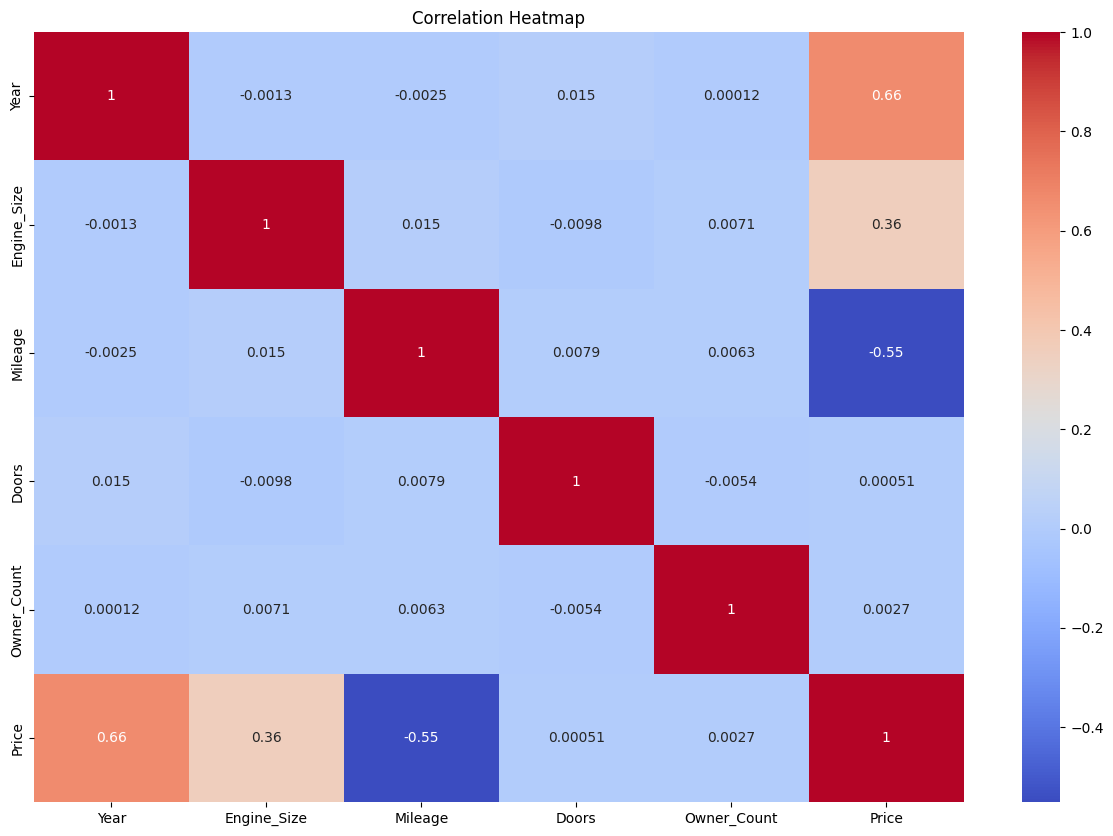

In [3]:
print("Data Types and Non-Null Counts:")
print(df.info())

print("Summary Statistics:")
print(df.describe().T)

print("Null Values:")
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

print("Distribution of Numerical Variables:")
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

print("Boxplots of Numerical Variables:")
n_cols = 3
n_rows = -(-len(numerical_columns) // n_cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Plot individual boxplots
for i, col in enumerate(numerical_columns):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("Count Outliers in Numerical Variables:")
for col in numerical_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"{col}: {outliers_count} outliers")

print("Correlation Heatmap:")
plt.figure(figsize=(15, 10))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

=== After Preprocessing ===
Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  int64  
 1   Model         10000 non-null  int64  
 2   Year          10000 non-null  float64
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  int64  
 5   Transmission  10000 non-null  int64  
 6   Mileage       10000 non-null  float64
 7   Doors         10000 non-null  float64
 8   Owner_Count   10000 non-null  float64
 9   Price         10000 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 781.4 KB
None
Summary Statistics:
   Brand  Model      Year  Engine_Size  Fuel_Type  Transmission   Mileage  \
0      6     24  0.869565         0.80          0             1  0.966648   
1      2     19  0.521739         0.25          2             0  0.017775   
2      7

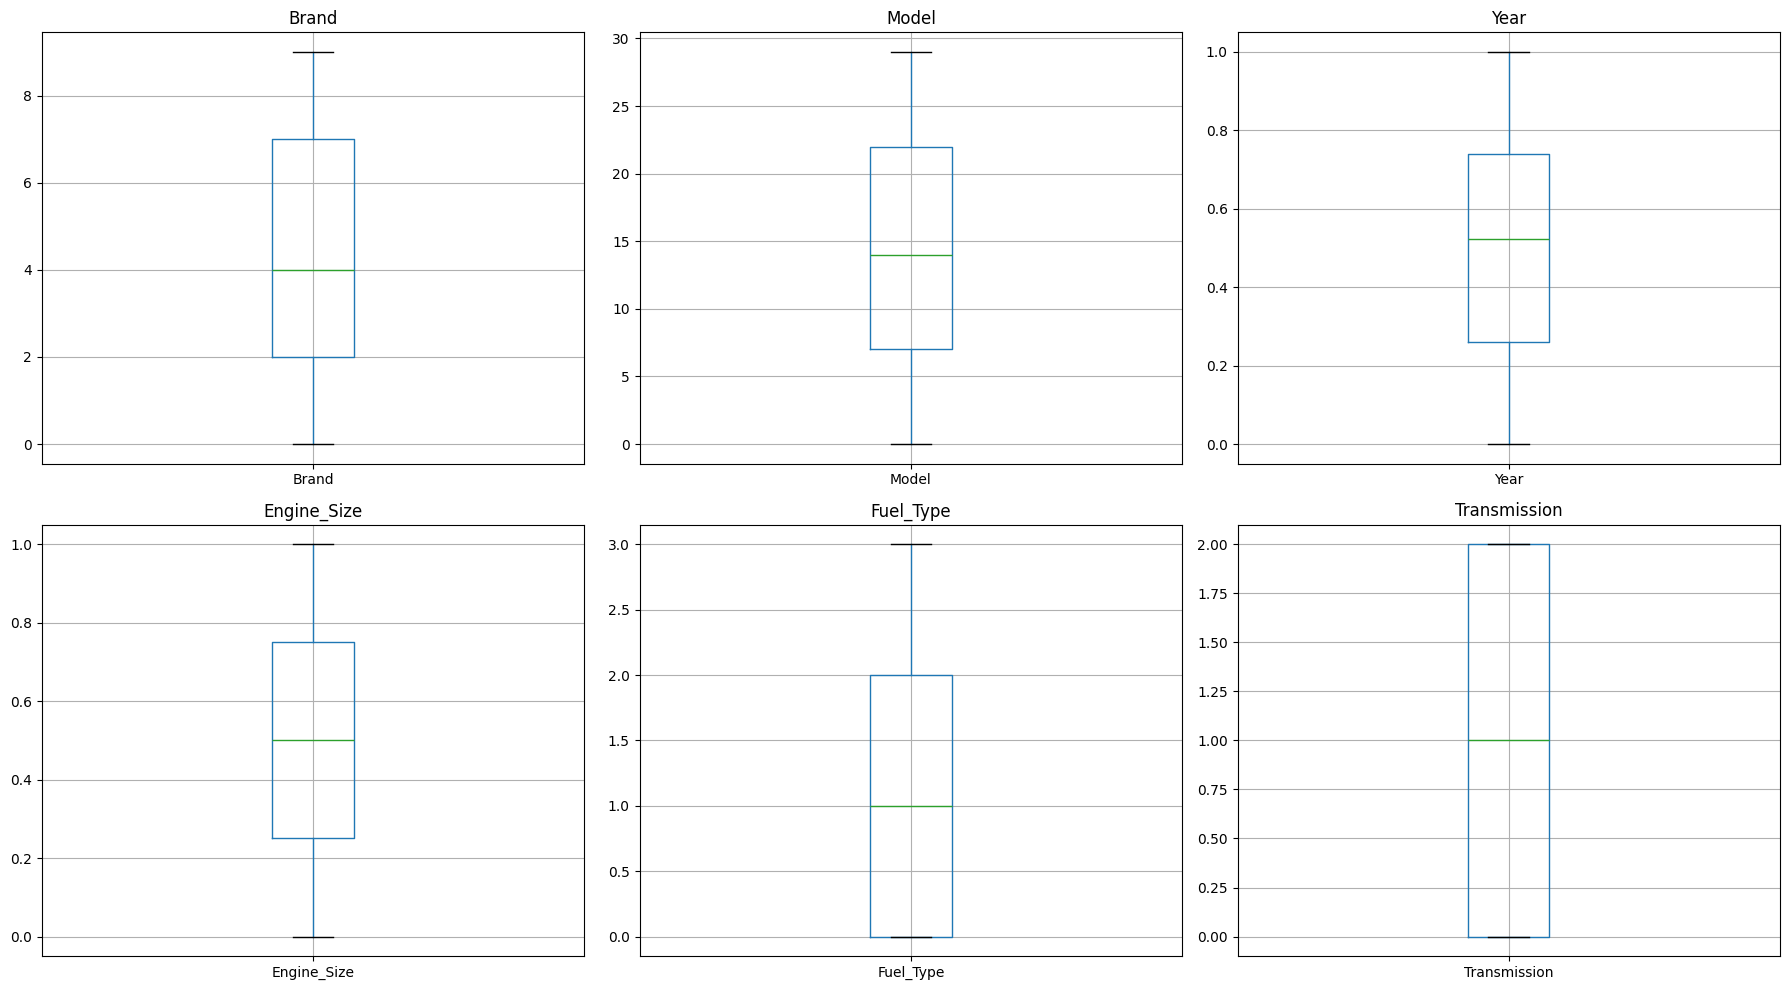

Train: 6000, Validation: 2000, Test: 2000


In [4]:
# Label Encoding
colsEncoder = ['Brand', 'Model','Fuel_Type','Transmission']

le = LabelEncoder()

# Create a dictionary to store label encoders
label_encoders = {}

for col in colsEncoder:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# min max scaling
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("=== After Preprocessing ===")
print("Data Types and Non-Null Counts:")
print(df.info())

print("Summary Statistics:")
print(df.head(5))

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

print("Boxplots of Numerical Variables:")
n_cols = 3
n_rows = -(-len(numerical_columns) // n_cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Remove any empty subplots
for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Only plot if we have available axes
        df.boxplot(column=col, ax=axes[i])
        axes[i].set_title(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Data Splitting
X = df.drop('Price', axis=1)
y = df['Price'] 

train_val_X, test_X, train_val_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


train_X, val_X, train_y, val_y = train_test_split(train_val_X, train_val_y, test_size=0.25, random_state=42)

print(f"Train: {len(train_X)}, Validation: {len(val_X)}, Test: {len(test_X)}")

# **6. Training Model**

In [5]:
model=LinearRegression()
model.fit(train_X,train_y)
y_train = model.predict(val_X)

mse = mean_squared_error(y_train,val_y)
print("=== Model Evaluation ===")
print("mse: ",mse)
print(f"R²: {r2_score(y_train, val_y):.4f}")
print(f"RMSE: {root_mean_squared_error(y_train, val_y):.4f}")

=== Model Evaluation ===
mse:  0.0030855890850925894
R²: 0.9081
RMSE: 0.0555


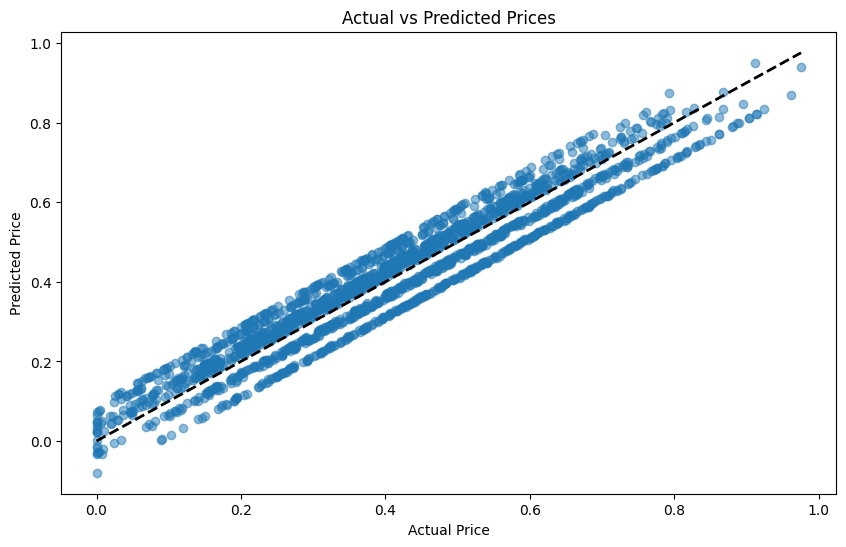

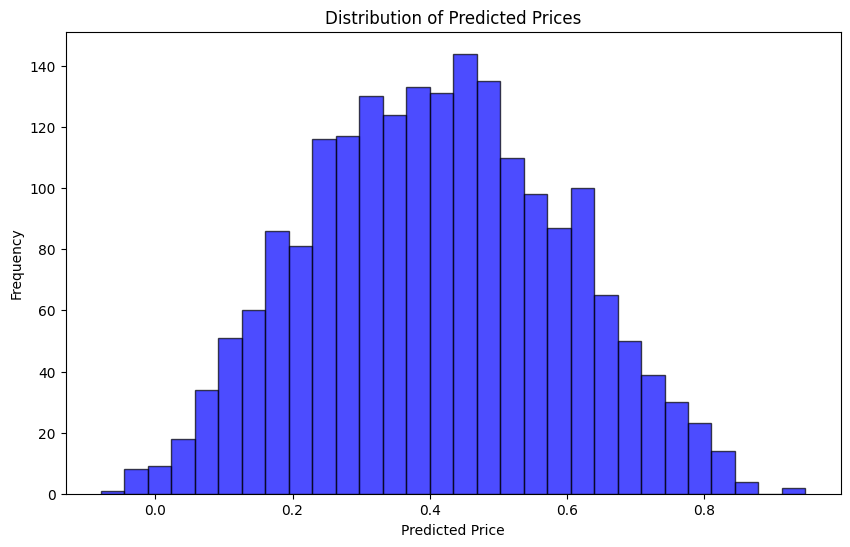

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(val_y, y_train, alpha=0.5)
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Predicted Price')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Prices')
plt.show()

# **7. Testing Model**

=== Test Set Evaluation ===
Predictions: [0.06755386 0.53158067 0.74201676 ... 0.41586338 0.31211907 0.5720597 ]
Test Set MSE: 0.0031
Test Set R²: 0.9040
Test Set RMSE: 0.0555


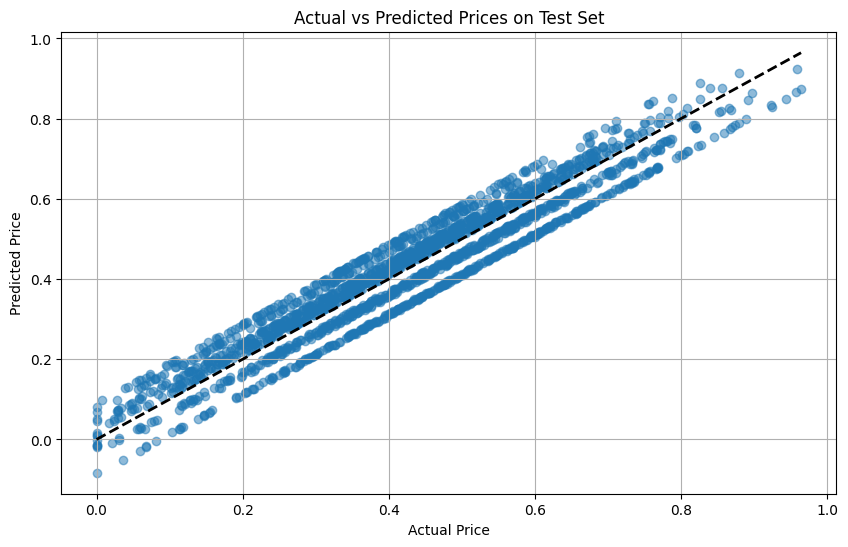

In [7]:
# test the model on the test set
y_test = model.predict(test_X)
mse_test = mean_squared_error(y_test, test_y)
print("=== Test Set Evaluation ===")
print(f"Predictions: {y_test}")
print(f"Test Set MSE: {mse_test:.4f}")
print(f"Test Set R²: {r2_score(y_test, test_y):.4f}")
print(f"Test Set RMSE: {root_mean_squared_error(y_test, test_y):.4f}")
plt.figure(figsize=(10, 6))
plt.scatter(test_y, y_test, alpha=0.5)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices on Test Set')
plt.grid(True)
plt.show()


# **8. Revert Preprocessing**

In [ ]:

# Get original values by inverse transforming
original_values = pd.DataFrame(scaler.inverse_transform(df[numerical_columns]), 
                             columns=numerical_columns, 
                             index=df.index)

# Replace scaled values with original values in the dataframe
df[numerical_columns] = original_values

print("=== After reverting min-max scaling ===")
print(df[numerical_columns].describe())

# Label Encoding Reversion
for col in colsEncoder:
    df[col] = label_encoders[col].inverse_transform(df[col].astype(int))


print("=== After Label Encoding Reversion ===")
print(df[colsEncoder].head())    

=== After reverting min-max scaling ===
               Year   Engine_Size        Mileage         Doors   Owner_Count  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    2011.543700      3.000560  149239.111800      3.497100      2.991100   
std        6.897699      1.149324   86322.348957      1.110097      1.422682   
min     2000.000000      1.000000      25.000000      2.000000      1.000000   
25%     2006.000000      2.000000   74649.250000      3.000000      2.000000   
50%     2012.000000      3.000000  149587.000000      3.000000      3.000000   
75%     2017.000000      4.000000  223577.500000      4.000000      4.000000   
max     2023.000000      5.000000  299947.000000      5.000000      5.000000   

             Price  
count  10000.00000  
mean    8852.96440  
std     3112.59681  
min     2000.00000  
25%     6646.00000  
50%     8858.50000  
75%    11086.50000  
max    18301.00000  
=== After Label Encoding Reversion ===
        Bra

# **9. Export Model**

In [9]:
model_filename = 'car_price_model.pkl'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to car_price_model.pkl


# **10. Kesimpulan dan Rekomendasi** 

Tulis Disini